**Importing Libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
train_dir='/content/drive/Othercomputers/My Laptop/dataset-crop-diseases/dataset-top-five-test-train/train'
test_dir='/content/drive/Othercomputers/My Laptop/dataset-crop-diseases/dataset-top-five-test-train/test'

img_height,img_width=180,180
batch_size = 16
epochs = 50
num_classes = 23


In [ ]:
training = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 18045 files belonging to 23 classes.


In [ ]:
testing = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2599 files belonging to 23 classes.


In [ ]:
class_names = training.class_names
print(class_names)

NameError: ignored

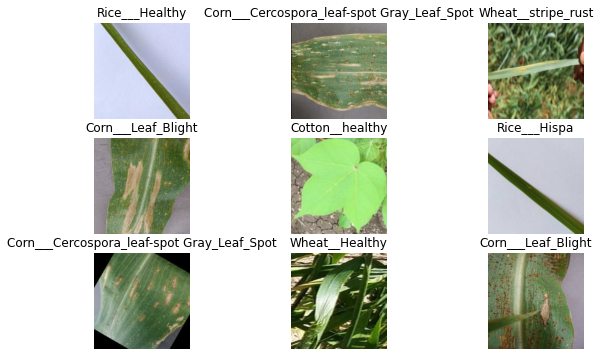

In [ ]:
plt.figure(figsize=(10, 6))
for images, labels in training.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history = model.fit(training, validation_data=testing, epochs=epochs)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1128/1128 [==============================] - 6155s 5s/step - loss: 0.9996 - accuracy: 0.6869 - val_loss: 0.6301 - val_accuracy: 0.7945
Epoch 2/50
1128/1128 [==============================] - 635s 562ms/step - loss: 0.5496 - accuracy: 0.8116 - val_loss: 0.4791 - val_accuracy: 0.8415
Epoch 3/50
1128/1128 [==============================] - 638s 565ms/step - loss: 0.4124 - accuracy: 0.8566 - val_loss: 0.5012 - val_accuracy: 0.8307
Epoch 4/50
1128/1128 [==============================] - 634s 561ms/step - loss: 0.3170 - accuracy: 0.8870 - val_loss: 0.5317 - val_accuracy: 0.8357
Epoch 5/50
1128/1128 [==============================] - 627s 556ms/step - loss: 0.2413 - accuracy: 0.9124 - val_loss: 0.4837 - val_accuracy: 0.8546
Epoch 6/50
1128/1128 [==============================] - 629s 557ms/step - loss: 0.2125 - accuracy: 0.9236 - val_loss: 0.4507 - val_accuracy: 0.8746
Epoch 7/50
1128/1128 [==============================] - 634s 562ms/step - loss: 0.1799 - accuracy: 0.9331 - val_loss: 0.4951 

In [ ]:
model

In [ ]:
from tensorflow.keras.models import Model
model.save('/content/drive/MyDrive/cropDiseaseDetectionModelV3/modelV3-2.h5')   # Saving model

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.set_style("white")
plt.suptitle('Train history', size = 15)

ax1.plot(epochs, acc, "bo", label = "Training acc")
ax1.plot(epochs, val_acc, "b", label = "Validation acc")
ax1.set_title("Training and validation acc")
ax1.legend()

ax2.plot(epochs, loss, "bo", label = "Training loss", color = 'red')
ax2.plot(epochs, val_loss, "b", label = "Validation loss", color = 'red')
ax2.set_title("Training and validation loss")
ax2.legend()

plt.show()

KeyError: ignored

In [ ]:
from keras.models import  load_model
model = load_model('/content/drive/MyDrive/cropDiseaseDetectionModelV3/modelV3-2.h5')

In [ ]:
def predict_image(img):
  img_3d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_3d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(23)}

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.6 MB 6.9 MB/s 
     |████████████████████████████████| 56 kB 5.0 MB/s 
     |████████████████████████████████| 106 kB 51.3 MB/s 
     |████████████████████████████████| 2.3 MB 41.2 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 213 kB 45.4 MB/s 
     |████████████████████████████████| 278 kB 50.1 MB/s 
     |████████████████████████████████| 55 kB 3.9 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 64 kB 2.9 MB/s 
     |████████████████████████████████| 80 kB 10.2 MB/s 
     |████████████████████████████████| 68 kB 7.7 MB/s 
     |████████████████████████████████| 68 kB 6.8 MB/s 
     |████████████████████████████████| 68 kB 7.0 MB/s 
     |████████████████████████████████| 46 kB 4.5 

In [ ]:
class_names = ['Cotton__bacterial_blight',
 'Corn_(maize)___healthy',
 'Cotton__curl_virus',
 'Cotton__fussarium_wilt',
 'Cotton__healthy',
 'Corn___Cercospora_leaf-spot Gray_Leaf_Spot',
 'Rice___Healthy',
 'Rice___Hispa',
 'Sugarcane__RedRust',
 'Sugarcane__Bacterial Blight',
 'Rice___Leaf_Blast',
 'Rice__Bacterial leaf blight',
 'Corn___Common_Rust',
 'Sugarcane__Healthy',
 'Rice__Brown spot',
 'Rice__Leaf smut',
 'Sugarcane__RedRot',
 'Corn___Leaf_Blight',
 'Wheat___Brown_Rust',
 'Wheat___Yellow_Rust',
 'Wheat__Healthy',
 'Wheat__septoria',
 'Wheat__stripe_rust']

In [ ]:
import gradio as gr
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=9)



app = gr.Interface(fn=predict_image, inputs=image, outputs=label)

app.launch(share=True,debug=True)

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://5a20684d9b682791.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


1/1 [==============================] - 0s 31ms/step
